[[ -4.16757847e-01  -5.62668272e-02]
 [ -2.13619610e+00   1.64027081e+00]
 [ -1.79343559e+00  -8.41747366e-01]
 [  5.02881417e-01  -1.24528809e+00]
 [ -1.05795222e+00  -9.09007615e-01]
 [  5.51454045e-01   2.29220801e+00]
 [  4.15393930e-02  -1.11792545e+00]
 [  5.39058321e-01  -5.96159700e-01]
 [ -1.91304965e-02   1.17500122e+00]
 [ -7.47870949e-01   9.02525097e-03]
 [ -8.78107893e-01  -1.56434170e-01]
 [  2.56570452e-01  -9.88779049e-01]
 [ -3.38821966e-01  -2.36184031e-01]
 [ -6.37655012e-01  -1.18761229e+00]
 [ -1.42121723e+00  -1.53495196e-01]
 [ -2.69056960e-01   2.23136679e+00]
 [ -2.43476758e+00   1.12726505e-01]
 [  3.70444537e-01   1.35963386e+00]
 [  5.01857207e-01  -8.44213704e-01]
 [  9.76147160e-06   5.42352572e-01]
 [ -3.13508197e-01   7.71011738e-01]
 [ -1.86809065e+00   1.73118467e+00]
 [  1.46767801e+00  -3.35677339e-01]
 [  6.11340780e-01   4.79705919e-02]
 [ -8.29135289e-01   8.77102184e-02]
 [  1.00036589e+00  -3.81092518e-01]
 [ -3.75669423e-01  -7.44707629e-02]
 

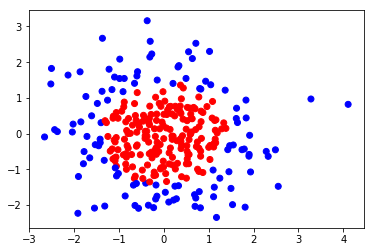

In [2]:
#coding:utf-8
#0导入模块 ，生成模拟数据集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
BATCH_SIZE = 30 
seed = 2 
#基于seed产生随机数
rdm = np.random.RandomState(seed)
#随机数返回300行2列的矩阵，表示300组坐标点（x0,x1）作为输入数据集
X = rdm.randn(300,2)
#从X这个300行2列的矩阵中取出一行,判断如果两个坐标的平方和小于2，给Y赋值1，其余赋值0
#作为输入数据集的标签（正确答案）
Y_ = [int(x0*x0 + x1*x1 <2) for (x0,x1) in X]
#遍历Y中的每个元素，1赋值'red'其余赋值'blue'，这样可视化显示时人可以直观区分
Y_c = [['red' if y else 'blue'] for y in Y_]
#对数据集X和标签Y进行shape整理，第一个元素为-1表示，随第二个参数计算得到，第二个元素表示多少列，把X整理为n行2列，把Y整理为n行1列
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)
print (X)
print (Y_)
print (Y_c)
#用plt.scatter画出数据集X各行中第0列元素和第1列元素的点即各行的（x0，x1），用各行Y_c对应的值表示颜色（c是color的缩写） 
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.show()

In [3]:
#定义神经网络的输入、参数和输出，定义前向传播过程 
def get_weight(shape, regularizer):
	w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
	tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
	return w

def get_bias(shape):  
    b = tf.Variable(tf.constant(0.01, shape=shape)) 
    return b
	
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2,11], 0.01)	
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
y = tf.matmul(y1, w2)+b2 

Instructions for updating:
Use the retry module or similar alternatives.


After 0 steps, loss is: 4.353055
After 2000 steps, loss is: 0.594807
After 4000 steps, loss is: 0.177465
After 6000 steps, loss is: 0.117746
After 8000 steps, loss is: 0.097412
After 10000 steps, loss is: 0.090327
After 12000 steps, loss is: 0.086182
After 14000 steps, loss is: 0.083131
After 16000 steps, loss is: 0.080591
After 18000 steps, loss is: 0.078400
After 20000 steps, loss is: 0.076895
After 22000 steps, loss is: 0.075655
After 24000 steps, loss is: 0.074577
After 26000 steps, loss is: 0.073346
After 28000 steps, loss is: 0.072430
After 30000 steps, loss is: 0.072000
After 32000 steps, loss is: 0.071619
After 34000 steps, loss is: 0.071315
After 36000 steps, loss is: 0.071032
After 38000 steps, loss is: 0.070802
w1:
 [[-0.69615382  0.30032742 -0.92680067  1.02694345  0.35201156  2.03483582
  -0.86743379 -0.98896909 -0.05647005  0.7033236  -0.43325284]
 [ 0.05705214  1.38015485  0.51443017 -0.94847184  0.16497201  0.48905766
  -0.85494196  0.57229662  0.25647357  1.40417266  1

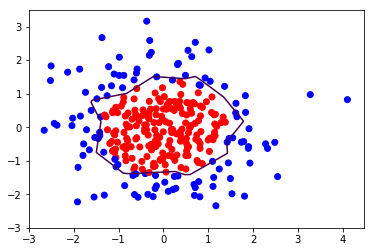

In [5]:
#定义损失函数
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))


#定义反向传播方法：不含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
	init_op = tf.global_variables_initializer()
	sess.run(init_op)
	STEPS = 40000
	for i in range(STEPS):
		start = (i*BATCH_SIZE) % 300
		end = start + BATCH_SIZE
		sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
		if i % 2000 == 0:
			loss_mse_v = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
			print("After %d steps, loss is: %f" %(i, loss_mse_v))
    #xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成二维网格坐标点
	xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
	#将xx , yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
	grid = np.c_[xx.ravel(), yy.ravel()]
	#将网格坐标点喂入神经网络 ，probs为输出
	probs = sess.run(y, feed_dict={x:grid})
	#probs的shape调整成xx的样子
	probs = probs.reshape(xx.shape)
	print ("w1:\n",sess.run(w1))
	print ("b1:\n",sess.run(b1))
	print ("w2:\n",sess.run(w2))	
	print ("b2:\n",sess.run(b2))

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

After 0 steps, loss is: 13.541724
After 2000 steps, loss is: 2.709691
After 4000 steps, loss is: 0.867588
After 6000 steps, loss is: 0.389568
After 8000 steps, loss is: 0.271922
After 10000 steps, loss is: 0.235852
After 12000 steps, loss is: 0.212534
After 14000 steps, loss is: 0.194180
After 16000 steps, loss is: 0.180717
After 18000 steps, loss is: 0.169475
After 20000 steps, loss is: 0.159367
After 22000 steps, loss is: 0.150807
After 24000 steps, loss is: 0.143239
After 26000 steps, loss is: 0.136374
After 28000 steps, loss is: 0.130389
After 30000 steps, loss is: 0.125144
After 32000 steps, loss is: 0.120703
After 34000 steps, loss is: 0.116274
After 36000 steps, loss is: 0.112662
After 38000 steps, loss is: 0.109250
w1:
 [[ 0.38859358 -0.57648927  0.35375145  0.17672518 -0.08500489 -0.1955643
   0.40461972  0.5022105  -0.40713498 -0.71169615  0.35051605]
 [ 0.03356011 -0.5857529  -0.36117649 -0.50875121  0.38702434 -0.00498096
   0.52192122  0.1878283  -0.53422034  0.11604775  0

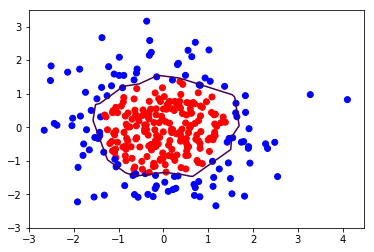

In [7]:
#定义反向传播方法：包含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
	init_op = tf.global_variables_initializer()
	sess.run(init_op)
	STEPS = 40000
	for i in range(STEPS):
		start = (i*BATCH_SIZE) % 300
		end = start + BATCH_SIZE
		sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
		if i % 2000 == 0:
			loss_v = sess.run(loss_total, feed_dict={x:X,y_:Y_})
			print("After %d steps, loss is: %f" %(i, loss_v))

	xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
	grid = np.c_[xx.ravel(), yy.ravel()]
	probs = sess.run(y, feed_dict={x:grid})
	probs = probs.reshape(xx.shape)
	print ("w1:\n",sess.run(w1))
	print ("b1:\n",sess.run(b1))
	print ("w2:\n",sess.run(w2))
	print ("b2:\n",sess.run(b2))

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.contour(xx, yy, probs, levels=[.5])
plt.show()